<a href="https://colab.research.google.com/github/nurlailyfau/nurlailyfau.github.io/blob/main/Topic_9_Statistik_Deskriptif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Random Variables and Distributions

In [2]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"STD1 = {np.sqrt(np.var(sample))}")
print(f"STD2 = {np.std(sample)}")

Sample: [5, 7, 6, 1, 4, 8, 7, 10, 1, 2, 4, 10, 7, 5, 2, 1, 6, 0, 9, 10, 7, 3, 3, 5, 0, 0, 10, 4, 7, 1]
Mean = 4.833333333333333
STD1 = 3.2360813064912666
STD2 = 3.2360813064912666


To visually estimate how many different values are there in the sample, we can plot the histogram:

(array([3., 4., 2., 2., 3., 3., 2., 5., 1., 5.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

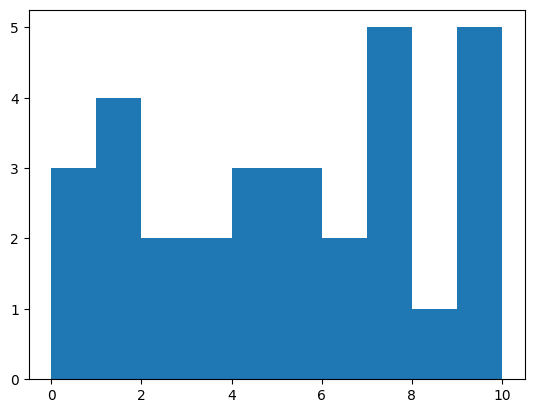

In [3]:
plt.hist(sample)

# Analyzing Real Data

In [4]:
df = pd.read_html("http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights")[1]
df.rename(columns={'Height(inches)':'Height','Weight(pounds)':'Weight'},inplace=True)
df

,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


Let's compute average values for age, height and weight:

In [5]:
df[['Age','Height','Weight']].median()

Age        27.925
Height     74.000
Weight    200.000
dtype: float64

In [6]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height     73.697292
Weight    201.689255
dtype: float64

Now let's focus on height, and compute standard deviation and variance:

In [7]:
print(list(df['Height'])[:20])

[74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 72, 73, 75, 78]


In [8]:
np.var(df['Height'])

5.311656110053163

In [10]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 73.6972920696325
Variance = 5.316798081118074
Standard Deviation = 2.3058183105175645


In addition to mean, it makes sense to look at median value and quartiles. They can be visualized using box plot:

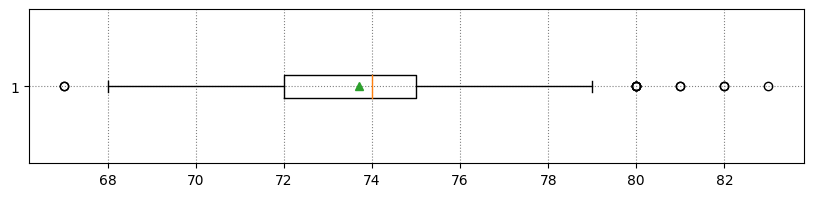

In [11]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'],vert=False,showmeans=True)
plt.grid(color='gray',linestyle='dotted')
plt.show()

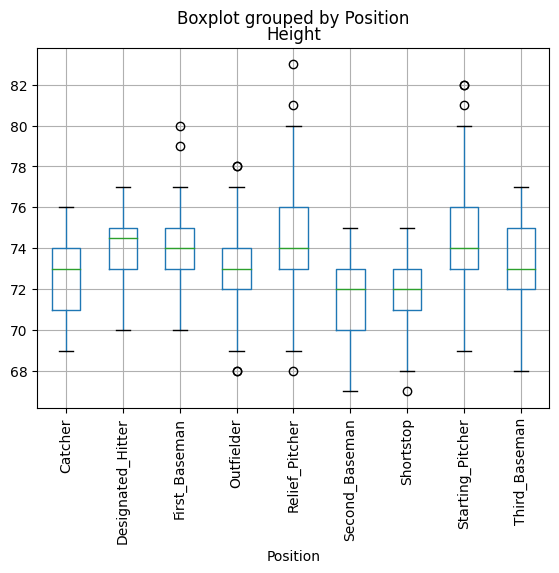

In [12]:
df.boxplot(column='Height',by='Position')
plt.xticks(rotation='vertical')
plt.show()

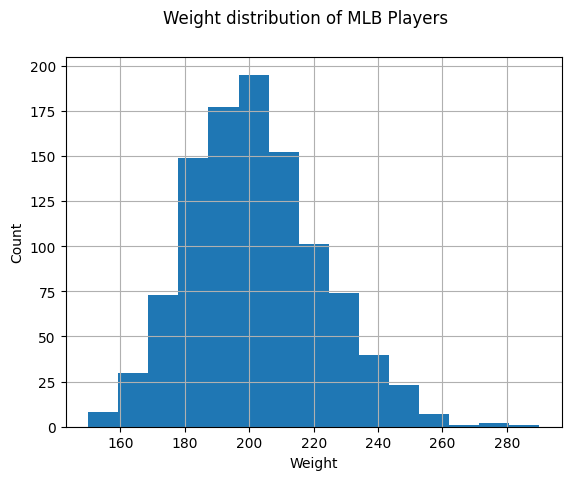

In [13]:
df['Weight'].hist(bins=15)
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

# Normal Distribution
Let's create an artificial sample of weights that follows normal distribution with the same mean and variance as real data:

In [14]:
generated = np.random.normal(0,1,200)
np.mean(generated)

0.06802486250701223

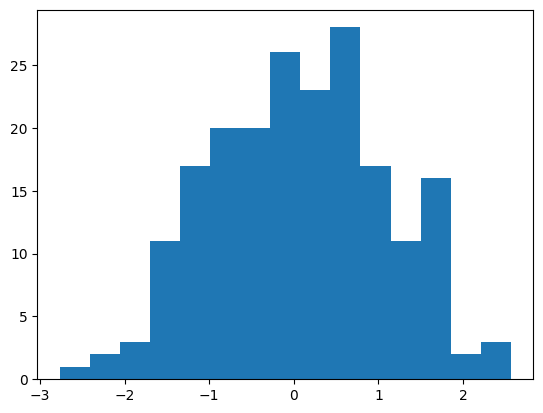

In [15]:
plt.hist(generated,bins=15)
plt.show()

Law of big number

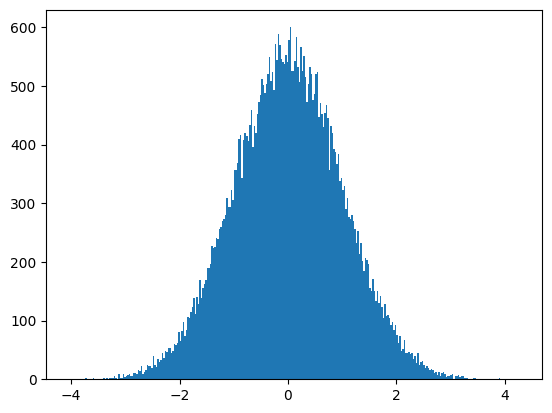

In [16]:
plt.hist(np.random.normal(0,1,50000),bins=300)
plt.show()

# Simulating Normal Distribution with Central Limit Theorem
Pseudo-random generator in Python is designed to give us uniform distribution. If we want to create a generator for normal distribution, we can use central limit theorem. To get a normally distributed value we will just compute a mean of a uniform-generated sample.

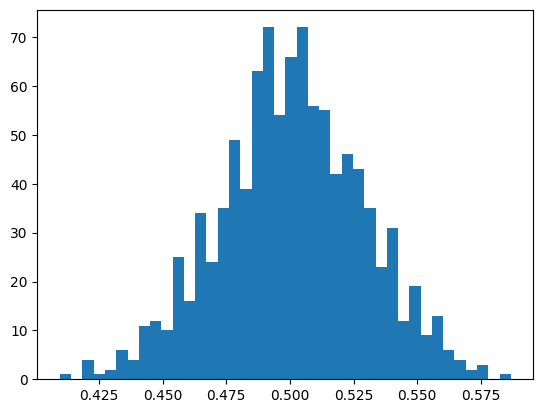

In [17]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample_rataan = [normal_random() for _ in range(1000)]
plt.hist(sample_rataan,bins = 40)
plt.show()

In [18]:
sample_size = 2
sample = [random.uniform(0,1) for _ in range(sample_size) ]
sample

[0.24780776988398734, 0.07787907779819048]